<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Preprocesado_y_estructuracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 2.3.3: Preprocesado y estructuración de datos

Montar acceso a Google *Drive*

In [3]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from rich.console import Console
console = Console()

## Limpieza de datos

In [10]:
console.rule("Limpieza de datos")

import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/Documentos/Master IA/Datasets/stroke-data.csv")
console.log(df)

nans = df.isnull().values.any()
print("\n - Hay algún NaN en el dataset:", nans)
print("\n - Dime si hay un valor NaN en la fila/columna: \n",df.isna())

# Selecciona columnas que tengan un valor NaN
df_n = df[df.isna().any(axis=1)]
print("\n - Columnas con NaNs:\n", df_n)

# Eliminamos los valores NaN
df = df.dropna()
nans = df.isnull().values.any()
print("\n - Hay algún NaN en el dataset: \n", nans)
print("\n - Dataset limpio: \n", df)


──────────────────────────────────────────────── Limpieza de datos ────────────────────────────────────────────────

[17:13:39]          id  gender   age  hypertension  heart_disease ever_married  \ <ipython-input-10-764d51a7f5ef>:6
           0      9046    Male  67.0             0              1          Yes                                     
           1     51676  Female  61.0             0              0          Yes                                     
           2     31112    Male  80.0             0              1          Yes                                     
           3     60182  Female  49.0             0              0          Yes                                     
           4      1665  Female  79.0             1              0          Yes                                     
           ...     ...     ...   ...           ...            ...          ...                                     
           5105  18234  Female  80.0             1              0          Yes                                     
           5106  44873  Female  81.0             0              0          Yes                                     
           5107  19723  Female  35.0             0              0          Yes                                     
           5108  37544    Male  51.0             0              0          Yes                                     
           5109  44679  Female  44.0             0              0          Yes                                     
                                                                                                                   
                     work_type Residence_type  avg_glucose_level   bmi                                             
           smoking_status  \                                                                                       
           0           Private          Urban             228.69  36.6  formerly                                   
           smoked                                                                                                  
           1     Self-employed          Rural             202.21   NaN     never                                   
           smoked                                                                                                  
           2           Private          Rural             105.92  32.5     never                                   
           smoked                                                                                                  
           3           Private          Urban             171.23  34.4                                             
           smokes                                                                                                  
           4     Self-employed          Rural             174.12  24.0     never                                   
           smoked                                                                                                  
           ...             ...            ...                ...   ...                                             
           ...                                                                                                     
           5105        Private          Urban              83.75   NaN     never                                   
           smoked                                                                                                  
           5106  Self-employed          Urban             125.20  40.0     never                                   
           smoked                                                                                                  
           5107  Self-employed          Rural              82.99  30.6     never                                   
           smoked                                                                                                  
           5108        Private          Rural             166.29  25.6  formerly                                   
           smoked                                       


 - Hay algún NaN en el dataset: True

 - Dime si hay un valor NaN en la fila/columna: 
          id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  a

## Transformación de *datos*

La función `MinMaxScaler` de la librería Scikit-learn (sklearn) es una técnica de preprocesamiento utilizada para escalar los valores de características (features) de un conjunto de datos a un rango específico. La idea detrás del MinMaxScaler es transformar los datos de manera que todos los valores de características se encuentren dentro del rango especificado, generalmente (0, 1), aunque también se puede especificar otro rango.

La fórmula utilizada para escalar los datos con MinMaxScaler es la siguiente:

```
X_scaled = (X - X_min) / (X_max - X_min)
```

donde:
- `X` es el valor original de una característica.
- `X_min` es el valor mínimo de esa característica en el conjunto de datos.
- `X_max` es el valor máximo de esa característica en el conjunto de datos.

La función MinMaxScaler es útil cuando queremos llevar todas las características de nuestros datos a la misma escala, lo que puede ser beneficioso para ciertos algoritmos de aprendizaje automático que son sensibles a las escalas de las características, como el descenso de gradiente o los algoritmos basados en distancias (k-NN, SVM, etc.).


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Creamos el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionamos columnas con valores numéricos de interés
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
df_s = df[columns_to_scale]

# Imprimimos los datos originales
print(" => Datos NO rescalados: \n", df_s.head())

# Aplicamos la función de scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_s), columns=columns_to_scale)

# Imprimimos los datos rescalados
print(" => Datos rescalados: \n", df_scaled.head())


 => Datos NO rescalados: 
     age  avg_glucose_level   bmi
0  67.0             228.69  36.6
2  80.0             105.92  32.5
3  49.0             171.23  34.4
4  79.0             174.12  24.0
5  81.0             186.21  29.0
 => Datos rescalados: 
         age  avg_glucose_level       bmi
0  0.816895           0.801265  0.301260
1  0.975586           0.234512  0.254296
2  0.597168           0.536008  0.276060
3  0.963379           0.549349  0.156930
4  0.987793           0.605161  0.214204


Text(0.5, 1.0, 'Normalizado')

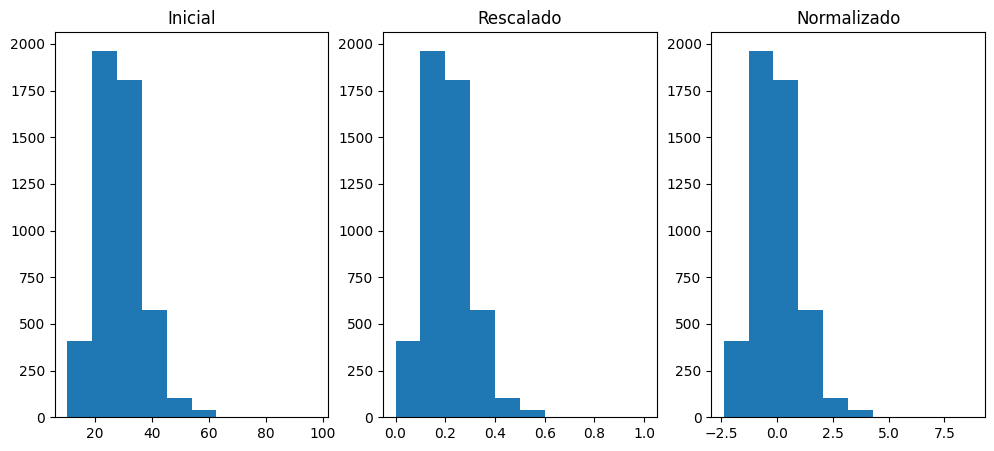

In [12]:
# Normalización
df_norm = (df_scaled - df_scaled.mean()) / df_scaled.std()

# Veámos el resultado
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12, 5))
plt.subplot(131)
plt.hist(df['bmi'].values)
plt.title("Inicial")
plt.subplot(132)
plt.hist(df_scaled['bmi'].values)
plt.title("Rescalado")
plt.subplot(133)
plt.hist(df_norm['bmi'].values)
plt.title("Normalizado")

## Codificación de variables categóricas

In [13]:
# Ejemplo de codificación one-hot con pandas
df = df[['id', 'age', 'bmi', 'gender']]
cod_gen = pd.get_dummies(df, prefix='gender')
print(cod_gen.head())

      id   age   bmi  gender_Female  gender_Male  gender_Other
0   9046  67.0  36.6              0            1             0
2  31112  80.0  32.5              0            1             0
3  60182  49.0  34.4              1            0             0
4   1665  79.0  24.0              1            0             0
5  56669  81.0  29.0              0            1             0


## Codificación de variables categóricas

* **LabelBinarizer**: Es una clase de Scikit-learn que se utiliza para binarizar etiquetas (categorías) en una variable categórica. En otras palabras, convierte una variable categórica en una representación binaria (0 o 1). Cuando usas fit_transform() en una columna de un DataFrame, convierte las categorías en columnas binarias donde cada columna representa una categoría y tiene un valor de 1 si la fila pertenece a esa categoría y 0 si no.
En el código, hemos aplicado LabelBinarizer a la columna 'gender' de un DataFrame de ejemplo, donde 'Male' y 'Female' son las categorías. El resultado es una matriz binaria donde cada fila representa un dato de 'gender', y hay dos columnas, una para 'Male' y otra para 'Female'.

* **OneHotEncoder**: Se utiliza para convertir variables categóricas en un formato denominado "one-hot encoding" o "one-out-of-N encoding". Esto implica que cada categoría se representa mediante una matriz binaria donde solo hay un valor de 1 y el resto son 0.
En el código, hemos aplicado LabelBinarizer previamente para obtener una matriz binaria y luego usamos OneHotEncoder para convertir esa matriz en un formato "one-hot encoding". El resultado es una matriz con una columna para cada categoría, y en cada fila hay un 1 en la columna correspondiente a la categoría y 0 en todas las demás columnas.

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

# Ejemplo de DataFrame de prueba
data = pd.DataFrame({'gender': ['Male', 'Female', 'Female', 'Male', 'Male']})

# LabelBinarizer
label_binarizer = LabelBinarizer()
data_lb = label_binarizer.fit_transform(data['gender'])
print("LabelBinarizer Output:\n", data_lb)

# OneHotEncoder
onehot_encoder = OneHotEncoder()
data_ohe = onehot_encoder.fit_transform(data_lb)
print("OneHotEncoder Output:\n", data_ohe.toarray())


LabelBinarizer Output:
 [[1]
 [0]
 [0]
 [1]
 [1]]
OneHotEncoder Output:
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
